In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# import data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train) , (x_test,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test/255.0
print("x_train.shape", x_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
x_train.shape (60000, 28, 28)


In [4]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# Number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
# Build the model using Functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3),strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 22s 5ms/step - loss: 0.5169 - accuracy: 0.8067 - val_loss: 0.4018 - val_accuracy: 0.8508
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3617 - accuracy: 0.8640 - val_loss: 0.3437 - val_accuracy: 0.8734
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3119 - accuracy: 0.8821 - val_loss: 0.3150 - val_accuracy: 0.8817
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2792 - accuracy: 0.8949 - val_loss: 0.3113 - val_accuracy: 0.8901
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2547 - accuracy: 0.9032 - val_loss: 0.2961 - val_accuracy: 0.8918
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2321 - accuracy: 0.9122 - val_loss: 0.3198 - val_accuracy: 0.8905
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2160 - accuracy: 0.9172 - val_loss: 0.2896 - val_accuracy

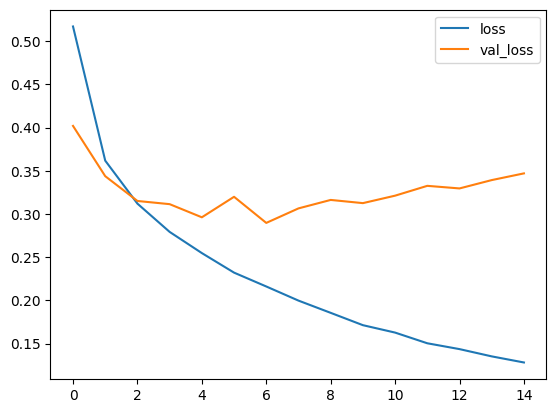

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

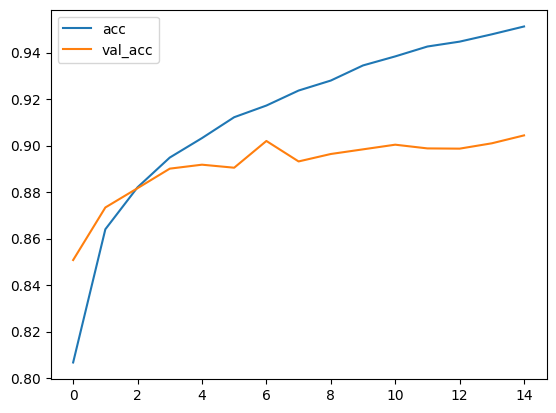

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[862   0  24  16   2   1  88   0   7   0]
 [  4 972   1  12   2   1   6   0   2   0]
 [ 18   1 869   9  40   0  63   0   0   0]
 [  7   4  15 918  26   0  30   0   0   0]
 [  1   1  67  30 819   0  82   0   0   0]
 [  0   0   0   2   0 971   0  17   1   9]
 [ 94   2  68  28  70   0 725   0  13   0]
 [  0   0   0   0   0   8   0 978   0  14]
 [  1   0   4   2   4   2   2   4 980   1]
 [  1   0   0   0   0   4   0  45   0 950]]


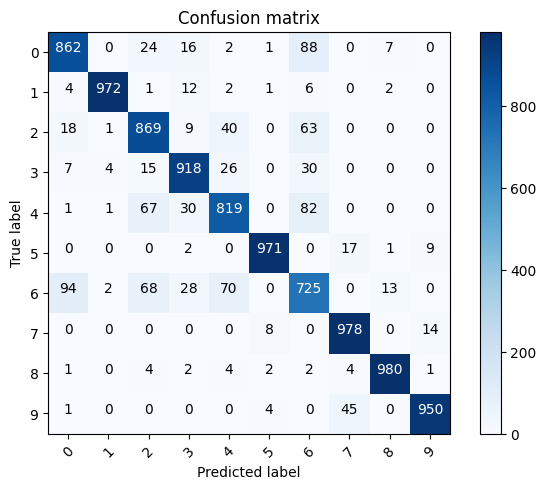

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

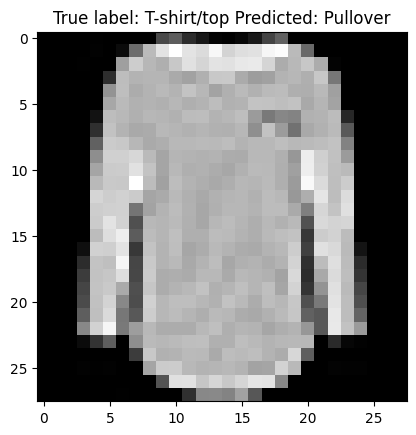

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));